<a href="https://colab.research.google.com/github/ClauCll/Curso_ML_A_Z/blob/master/Regresi%C3%B3n/Regresion_Bajas_Antiguedad_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cuantas serán las bajas voluntarias de los clientes fijos para el periodo 202009 - 202012
 

In [40]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import gspread
from oauth2client.client import GoogleCredentials 
from google.colab import auth
# Autoriza Claudia
auth.authenticate_user()
gc = gspread.authorize (GoogleCredentials.get_application_default())

### leemos datos

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
data = pd.read_csv('/content/drive/My Drive/Dataset/BAJAS.txt',delimiter='~')
X  = data.iloc[:,:-1].values
Y  = data.iloc[:,9]
Y = Y[:,np.newaxis]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


In [ ]:
X

In [43]:
#Dimensiones
data.shape

(19, 10)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ANIO_BAJA        19 non-null     int64
 1   MES_BAJA         19 non-null     int64
 2   TRIM_1           19 non-null     int64
 3   TRIM_2           19 non-null     int64
 4   TRIM_3           19 non-null     int64
 5   TRIM_4           19 non-null     int64
 6   ENTRE_1_2_ANIOS  19 non-null     int64
 7   ENTRE_3_4_ANIOS  19 non-null     int64
 8   MAS_5_ANIOS      19 non-null     int64
 9   TOTAL_BAJAS      19 non-null     int64
dtypes: int64(10)
memory usage: 1.6 KB


In [19]:
# Se convierte la variable MES_BAJA tipo string
# ==============================================================================
data.MES_BAJA = data.MES_BAJA.astype("str")
data.ANIO_BAJA = data.ANIO_BAJA.astype("str")

In [ ]:
data.TOTAL_BAJAS

In [10]:
# Variables numéricas
data.select_dtypes(include=['float64', 'int']).describe()

,ANIO_BAJA,MES_BAJA,TRIM_1,TRIM_2,TRIM_3,TRIM_4,ENTRE_1_2_ANIOS,ENTRE_3_4_ANIOS,MAS_5_ANIOS,TOTAL_BAJAS
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,2019.368421,5.578947,42.789474,24.368421,22.789474,206.052632,647.736842,426.421053,35.105263,1405.263158
std,0.495595,3.321910,22.069534,10.430780,9.186820,79.663510,149.704465,263.831031,42.276727,392.473473
min,2019.000000,1.000000,19.000000,11.000000,7.000000,98.000000,350.000000,231.000000,0.000000,817.000000
25%,2019.000000,3.000000,27.500000,17.500000,17.500000,147.500000,546.000000,313.000000,5.000000,1099.000000
50%,2019.000000,5.000000,39.000000,21.000000,20.000000,181.000000,658.000000,371.000000,11.000000,1458.000000
75%,2020.000000,7.500000,47.500000,28.500000,26.000000,268.000000,733.500000,430.000000,48.000000,1541.000000
max,2020.000000,12.000000,99.000000,54.000000,45.000000,374.000000,980.000000,1470.000000,139.000000,2435.000000


In [12]:
# Valores observados de 1trim
# ==============================================================================
data.TRIM_1.value_counts()

20    2
43    2
35    2
29    1
26    1
88    1
23    1
54    1
19    1
51    1
44    1
42    1
39    1
69    1
99    1
34    1
Name: TRIM_1, dtype: int64

In [20]:
# Variables cualitativas (tipo object)
# ==============================================================================
data.select_dtypes(include=['object']).describe()

,ANIO_BAJA,MES_BAJA
count,19,19
unique,2,12
top,2019,6
freq,12,2


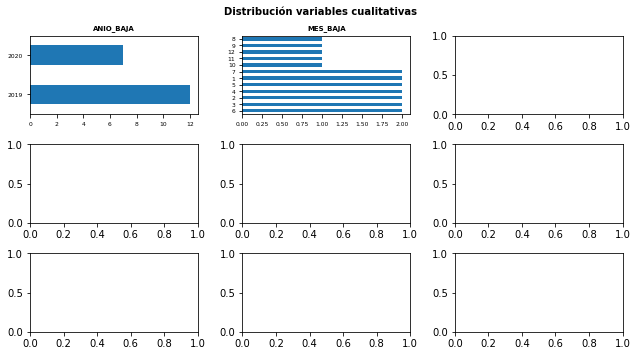

In [25]:
# Gráfico para cada variable cualitativa
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_object = data.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    data[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
#for i in [7, 8]:
#    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 10, fontweight = "bold");

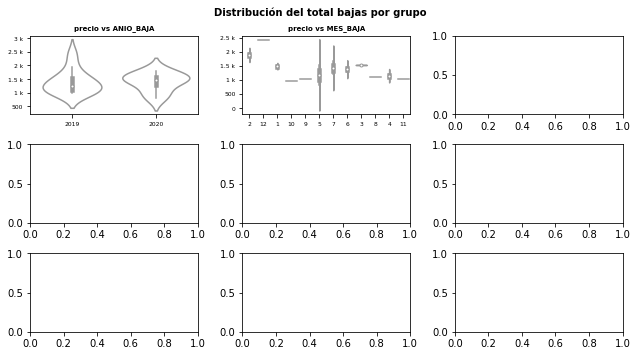

In [28]:
# Gráfico relación entre el precio y cada cada variables cualitativas
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
import seaborn as sns
import matplotlib.ticker as ticker

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_object = data.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = 'TOTAL_BAJAS',
        data  = data,
        color = "white",
        ax    = axes[i]
    )
    axes[i].set_title(f"precio vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
#for i in [7, 8]:
#    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución del total bajas por grupo', fontsize = 10, fontweight = "bold");

In [29]:
# Datos en entrenamiento y test.
# ==============================================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        data.drop('TOTAL_BAJAS', axis = 'columns'),
                                        data['TOTAL_BAJAS'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [31]:
y_test.describe()

count       4.000000
mean     1108.250000
std       302.584837
min       817.000000
25%       937.750000
50%      1046.000000
75%      1216.500000
max      1524.000000
Name: TOTAL_BAJAS, dtype: float64

In [30]:
y_train.describe()

count      15.000000
mean     1484.466667
std       382.753159
min      1018.000000
25%      1211.000000
50%      1476.000000
75%      1603.500000
max      2435.000000
Name: TOTAL_BAJAS, dtype: float64

In [48]:
#selección de caracteristicas basadas en L1
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, Y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(19, 5)

In [ ]:
X_new 

## Modelo SVM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR

In [ ]:
x  = x_mes[ c3[:,0]==1 , 0 ]
y  = Y [ c3[:,0]==1 , 0 ]
x  = x[:,np.newaxis]
y  = y[:,np.newaxis]

x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size=0.2, random_state=0)

In [ ]:
svr= SVR(kernel='rbf',degree=3, C=1.0, epsilon=0.2)
svr.fit(x_train,y_train)

In [ ]:
y_predic = svr.predict(x_test)

In [ ]:
print(svr.score(x_test,y_predic))

1.0
